<a href="https://colab.research.google.com/github/BinaryBeast-007/AI_for_Network_Security/blob/main/1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Load the dataset (Make sure to adjust the path accordingly)
dataset_path = "/content/KDDTrain+_20Percent.txt"
# dataset_path = "/content/KDDTrain+.txt"
# dataset_path2 = "/content/KDDTest+.txt"
column_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment",
                "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
                "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
                "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
                "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
                "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

df = pd.read_csv(dataset_path, header=None, names=column_names)
# df2 = pd.read_csv(dataset_path2, header=None, names=column_names)


In [2]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,exec,RSTO,0,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,19
0,tcp,ftp_data,SF,334,0,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient,12
0,tcp,private,REJ,0,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
0,tcp,nnsp,S0,0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [3]:
df['label'] = df['dst_host_srv_rerror_rate'].apply(lambda x: 0 if x != 'normal' else 1)
# df2['label'] = df2['dst_host_srv_rerror_rate'].apply(lambda x: 0 if x != 'normal' else 1)

In [4]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,exec,RSTO,0,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,0
0,tcp,ftp_data,SF,334,0,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient,0
0,tcp,private,REJ,0,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,0
0,tcp,nnsp,S0,0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0


In [5]:
# Drop redundant columns
df = df.drop(["duration", "protocol_type", "service", "dst_host_srv_rerror_rate"], axis=1)
# df2 = df2.drop(["duration", "protocol_type", "service", "dst_host_srv_rerror_rate"], axis=1)
# # Convert categorical labels to binary (1 for normal, 0 for anomaly)
# df['label'] = df['label'].apply(lambda x: 0 if x != 'normal.' else 1)

In [6]:
# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# # Separate features and labels
# X_test = df2.drop('label', axis=1)
# y_test = df2['label']

In [7]:
df

,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,label
0,491,0,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
0,146,0,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
0,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
0,232,8153,0,0,0,0,0,1,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
0,199,420,0,0,0,0,0,1,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,0
0,334,0,0,0,0,0,0,1,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,0
0,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
0,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0


In [8]:
# # Flatten the data before standardization
# X_train_flattened = X_train.reshape((X_train.shape[0], -1))
# X_test_flattened = X_test.reshape((X_test.shape[0], -1))

# # Standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_flattened)
# X_test_scaled = scaler.transform(X_test_flattened)

# # Reshape the standardized data back to the original shape
# X_train_scaled = X_train_scaled.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_scaled = X_test_scaled.reshape((X_test.shape[0], X_test.shape[1], 1))


In [9]:
# # Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# scaler = StandardScaler()
# X_test = scaler.fit_transform(X_test)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Reshape the data for 1D CNN
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# X_train = X_train_scaled
# X_test = X_test_scaled
# Build the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)



Epoch 1/10
630/630 [==============================] - 11s 14ms/step - loss: 0.1452 - accuracy: 0.9505 - val_loss: 0.0826 - val_accuracy: 0.9671
Epoch 2/10
630/630 [==============================] - 7s 11ms/step - loss: 0.0934 - accuracy: 0.9659 - val_loss: 0.0633 - val_accuracy: 0.9780
Epoch 3/10
630/630 [==============================] - 9s 14ms/step - loss: 0.0758 - accuracy: 0.9709 - val_loss: 0.0566 - val_accuracy: 0.9778
Epoch 4/10
630/630 [==============================] - 7s 11ms/step - loss: 0.0673 - accuracy: 0.9750 - val_loss: 0.0527 - val_accuracy: 0.9806
Epoch 5/10
630/630 [==============================] - 9s 14ms/step - loss: 0.0647 - accuracy: 0.9742 - val_loss: 0.0557 - val_accuracy: 0.9827
Epoch 6/10
630/630 [==============================] - 7s 11ms/step - loss: 0.0578 - accuracy: 0.9770 - val_loss: 0.0494 - val_accuracy: 0.9827
Epoch 7/10
630/630 [==============================] - 4s 7ms/step - loss: 0.0544 - accuracy: 0.9781 - val_loss: 0.0492 - val_accuracy: 0.9831

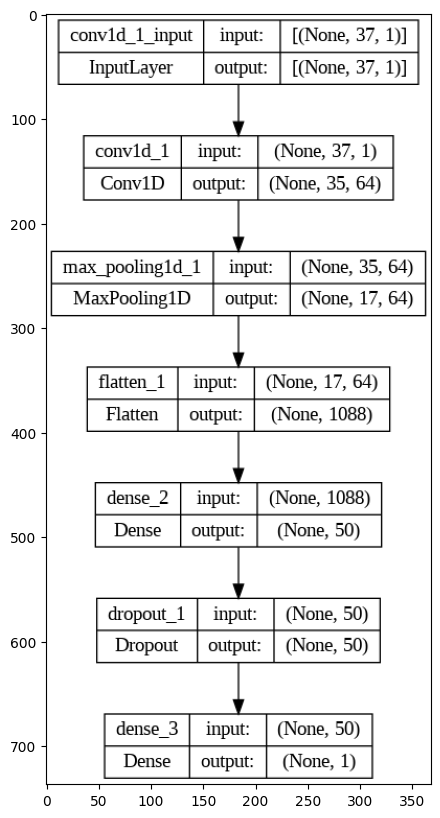

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Plot the model architecture
plot_model(model, to_file='1d_cnn_model.png', show_shapes=True, show_layer_names=True)

# Display the generated image
img = plt.imread('1d_cnn_model.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()


In [10]:
y_pred = (y_pred > 0.5).astype(int)

In [11]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [12]:
y_test

0    0
0    1
0    0
0    1
0    0
    ..
0    1
0    1
0    1
0    1
0    1
Name: label, Length: 5039, dtype: int64

In [13]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2365
           1       0.99      0.98      0.98      2674

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039



In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.9879245283018868
Recall: 0.9790575916230366
F1-Score: 0.9834710743801652


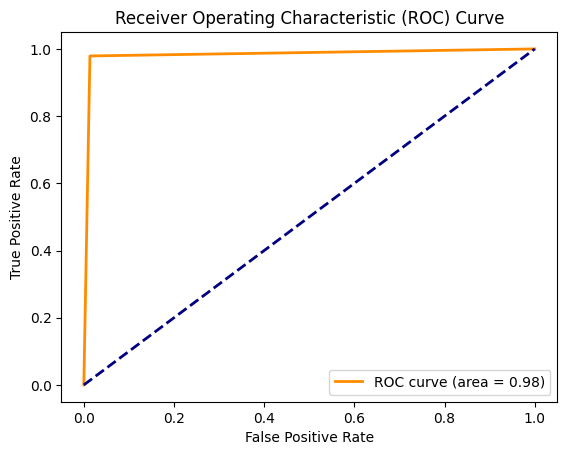

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9825362175034729


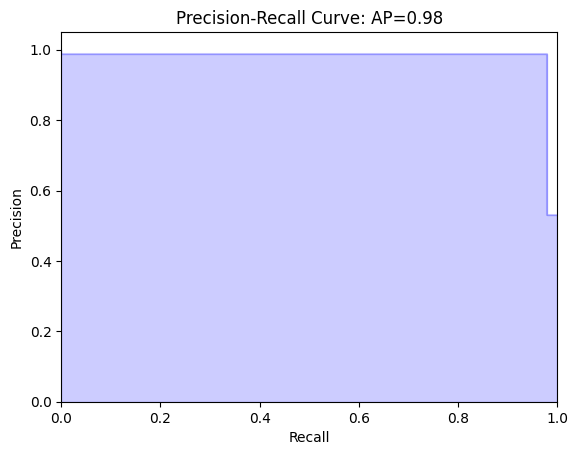

In [17]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()


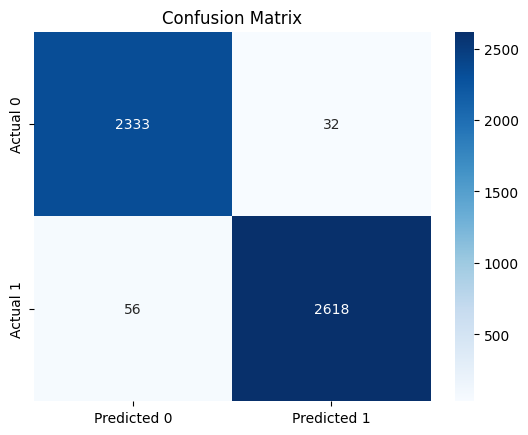

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.show()


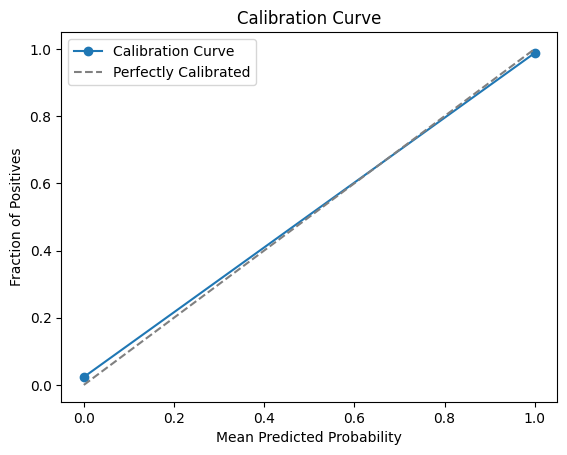

In [19]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()
